Processando base de dados

Variáveis: file, alg, min_support, separar_paragrafos

In [1]:
import importlib
import utils.pre_processing_news as ppn

importlib.reload(ppn)

file = "manifestacao_bolsonaro"
#file = "resgate_juliana_marins"
#file = "morte_juliana_marins"
#file = "manifestacao_resgate"
separar_paragrafos = True
isTitulo = False

input_file = "datasets/" + file + ".csv"
column = "Título" if isTitulo else "Texto"

# 1. Pré processando base de dados
print("Pré-processando textos...")
pre_processing_result, noticias = ppn.pre_processing_database(
    file_path = input_file,
    separar_paragrafos = separar_paragrafos,
    column=column
)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\luiza\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\luiza\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Pré-processando textos...


Gerando Trie of Rules

Gerando árvore de regras (TOR)...


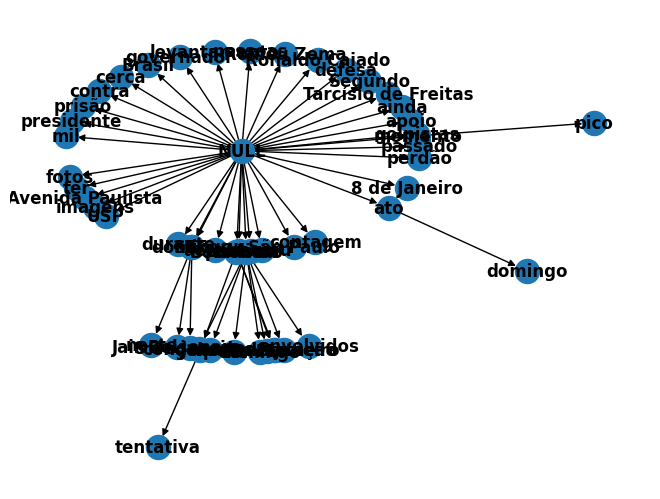

In [4]:
from trieofrules import trieofrules

#supported algorithms: FP-max, FP-growth, Apriori
#alg = 'Apriori'
alg = 'FP-max'
min_support = 0.05

obs = "p" if separar_paragrafos else "n"
obs = "titulos" if isTitulo else obs
file_name = f"{file}_{obs}_{alg}_{min_support}"
output_file = f"outputs/{file_name}.graphml"

# 2. Gera o TOR (Trie of Rules) a partir dos dados
print("Gerando árvore de regras (TOR)...")
TOR = trieofrules(data=pre_processing_result, alg=alg, min_support=min_support)
TOR.draw()

In [76]:
# 3. Salva a visualização e estrutura como .graphml
print("Salvando .graphml...")
TOR.save_graph(filename=output_file)

Salvando .graphml...


Analisando contexto das ocorrências

In [12]:
import utils.analize_tor as ator

importlib.reload(ator)

palavra_mais_usada = next(iter(TOR.frequent_items)).lower() 
ator.concordance(noticias, palavra_mais_usada)

Número de ocorrências: 96

         o ato com o ex-presidente jair bolsonaro (pl) na avenida paulista neste domingo 
no rio de janeiro, também convocada por bolsonaro e aliados, reuniu cerca de 18,3 mil pes
to na paulista   como foi o ato além de bolsonaro, estavam presentes na manifestação o go
democracia.   por volta das 15h40, jair bolsonaro discursou e pediu anistia para os preso
as disse que "eleições em 2026 sem jair bolsonaro é negar a democracia, é escancarar a di
bunal superior eleitoral (tse) condenou bolsonaro à inelegibilidade até 2030 por abuso de
unanimidade tornar réus o ex-presidente bolsonaro e mais sete aliados por tentativa de go
pontos.  o ato com o ex-presidente jair bolsonaro (pl) e diversos aliados na avenida paul
o do tribunal superior eleitoral (tse), bolsonaro disse que “eleições em 26 sem jair bols
naro disse que “eleições em 26 sem jair bolsonaro é negar a democracia, é escancarar a di
 presença de público, o comício de jair bolsonaro na avenida paulista pod

Recomendar notícia mais compacta e relevante

In [9]:
import utils.analize_tor as ator

importlib.reload(ator)

proporcoes, resumo = ator.recomendar_resumo(noticias, output_file)
print("Texto recomendado:", resumo)

Melhor proporção: 13.39
Texto recomendado: O ex-presidente Jair Bolsonaro (PL) reuniu cerca de 44,9 mil apoiadores na Avenida Paulista, em São Paulo, neste domingo, 6, para pedir o perdão político aos condenados pela invasão às sedes dos Três Poderes, em 8 de janeiro de 2023.

A estimativa é do Monitor do Debate Público do Meio Digital, da Universidade de São Paulo (USP), que fez o levantamento a partir de fotos aéreas do momento de pico da manifestação, durante o discurso de Bolsonaro, que iniciou cerca de 15h44 e durou 25 minutos.

Em fevereiro do ano passado, quando Bolsonaro também foi à Paulista pedir anistia aos presos do 8 de Janeiro, o ex-presidente reuniu cerca de 185 mil manifestantes, conforme a mesma contagem da USP. Já a Secretaria de Segurança Pública (SSP) estimou 600 mil pessoas presentes. Neste ano, tanto a Secretaria como a Polícia Militar informaram que não haverá estimativa de público.

Em setembro do ano passado, pedindo o impeachment do ministro Alexandre de Morae

In [11]:
import utils.analize_tor as ator

importlib.reload(ator)

ator.recomendar_texto_centralidade_semantica(input_file)

Texto mais central semanticamente:

Imagens aéreas mostram o ato na Avenida Paulista realizado neste domingo (6) a favor da anistia aos condenados nos ataques de 8 de janeiro em Brasília, o maior ataque às instituições da República desde que o Brasil voltou a ser uma democracia.

A manifestação reuniu cerca de 44,9 mil pessoas, segundo a metodologia utilizada pela Universidade de São Paulo (USP) em parceria com o Cebrap e a ONG More in Commom, que consiste em usar imagens da multidão, capturadas por drones.

A contagem foi feita no momento de pico da manifestação, às 15h44, a partir de fotos aéreas analisadas com software de inteligência artificial.

Há 3 semanas, uma outra manifestação, no Rio de Janeiro, também convocada por Bolsonaro e aliados, reuniu cerca de 18,3 mil pessoas, segundo a mesma metodologia.

O protesto começou por volta das 14h. Houve discursos com críticas ao Supremo Tribunal Federal (STF) e em defesa do projeto de lei em tramitação na Câmara que concede anistia aos

Outras visualizações

In [17]:
#Nuvem de palavras

import csv
import os
import importlib
import utils.analize_tor as ator

importlib.reload(ator)

pasta_raking = "ranking_palavras"
os.makedirs(pasta_raking, exist_ok=True)

ranking = ator.ranking_words(pre_processing_result)
file_ranking = os.path.join(pasta_raking, f"{file_name}_ranking_palavras.csv")
with open(file_ranking, mode="w", newline="", encoding="utf-8") as arquivo_csv:
    writer = csv.writer(arquivo_csv)
    writer.writerows(ranking)

In [ ]:
#TextArc, Word Tree - Todos os textos como uma string 

print(" ".join(noticias))

O ato com o ex-presidente Jair Bolsonaro (PL) na Avenida Paulista neste domingo (6) a favor da anistia aos envolvidos nos ataques de 8 de janeiro reuniu cerca de 44,9 mil manifestantes, segundo metodologia do Monitor do Debate Político do Cebrap em parceria com a ONG More in Common, que consiste em usar imagens da multidão, capturadas por drones.


A contagem foi feita no momento de pico da manifestação, às 15h44, a partir de fotos aéreas analisadas com software de inteligência artificial.


Há 3 semanas, uma outra manifestação, no Rio de Janeiro, também convocada por Bolsonaro e aliados, reuniu cerca de 18,3 mil pessoas, segundo a mesma metodologia.


Entenda como foi feita a contagem:

Foram tiradas fotos em três diferentes horários (14:05, 14:42 e 15:44), totalizando 47 imagens.


Nove fotos tiradas às 15:44, momento de pico da manifestação, foram selecionadas para a contagem.


A imagem cobriu toda a extensão da manifestação em três diferentes pontos de concentração na Avenida Paul

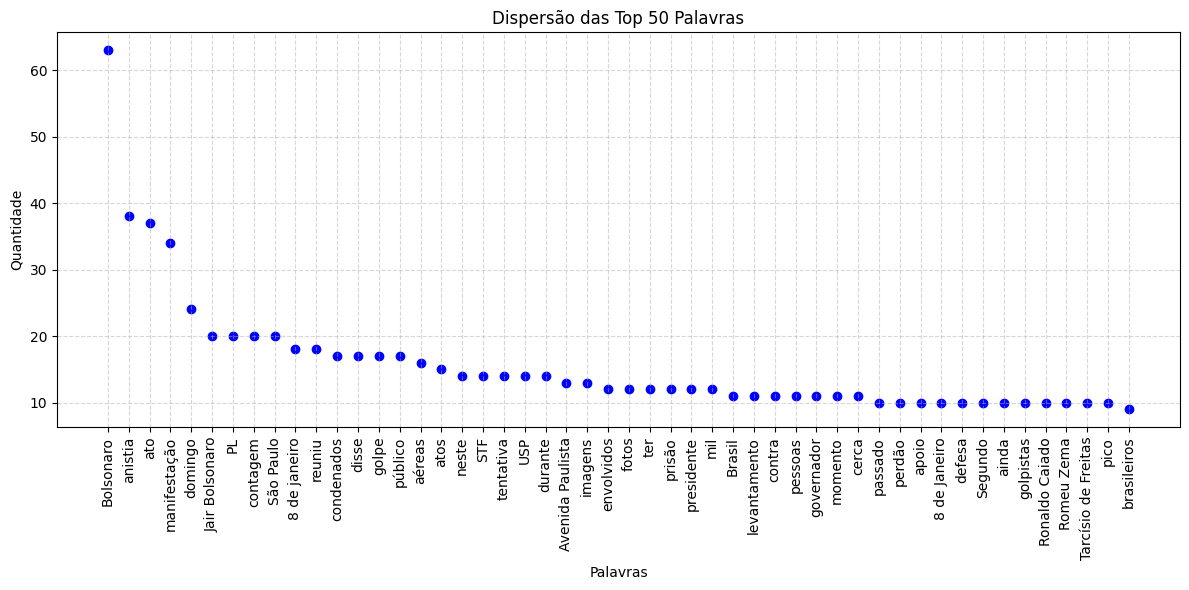

In [ ]:
# Gráfico de frequência

import pandas as pd
import utils.other_visualizations as ovi

importlib.reload(ovi)

df = pd.read_csv(file_ranking, names=['palavra', 'quantidade'])
ovi.scartter_plot_from_ranking(df)
